<a href="https://colab.research.google.com/github/Rohan-1103/Data-Science/blob/main/task_41.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import normal
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

In [2]:
df = pd.read_csv('/content/Electric_Vehicle_Population_Data.csv')
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,3C3CFFGE1G,Yakima,Yakima,WA,98908.0,2016,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,14.0,180778377,POINT (-120.60199 46.59817),PACIFICORP,5.307700e+10
1,WP0AB2Y16L,King,Auburn,WA,98092.0,2020,PORSCHE,TAYCAN,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,203.0,0.0,47.0,277717723,POINT (-122.18497 47.28825),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
2,5YJ3E1EB2J,King,Seattle,WA,98109.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,36.0,475865722,POINT (-122.35022 47.63824),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJYGDEF5L,King,Seattle,WA,98125.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,46.0,108837249,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
4,5YJXCBE22J,Thurston,Olympia,WA,98501.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,22.0,259851259,POINT (-122.89165 47.03954),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147529,1N4AZ1CP3K,King,Vashon,WA,98070.0,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150.0,0.0,34.0,259423153,POINT (-122.4573 47.44929),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
147530,5YJ3E1EB9R,King,Woodinville,WA,98072.0,2024,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,45.0,272424001,POINT (-122.15545 47.75448),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
147531,7FCTGBAA5P,King,Seattle,WA,98122.0,2023,RIVIAN,R1T,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,37.0,267090295,POINT (-122.31009 47.60803),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
147532,1N4AZ0CP8F,King,Seattle,WA,98104.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,37.0,167934567,POINT (-122.32945 47.60357),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10


### `Q.1`. Given a normal distribution with mean as 50 and deviation as 10, answer below questions

(X ~ N(5O, 10) ):

    a. what are the values of the mean and standard deviation?
    b. What value of x has a z-score of 1.4?
    c. What is the Z-score that corresponds to x = 30?
    d. What is the difference between positive and negative z values?

Mean:  41.18100479895887
Standard Deviation:  79.68216974085509


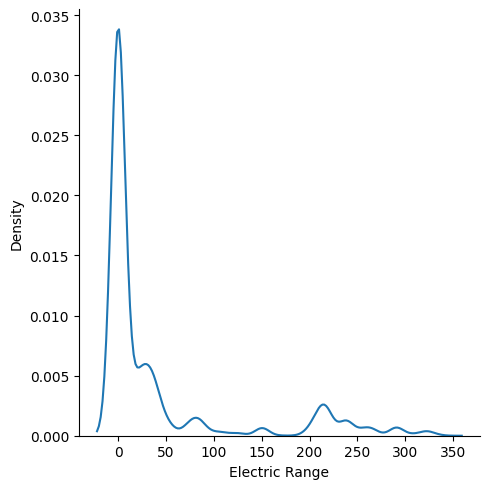

In [5]:
# i
sns.displot(data=df, kind = 'kde', x = 'Electric Range')
print("Mean: ", df['Electric Range'].mean())
print("Standard Deviation: ", df['Electric Range'].std())

In [10]:
# ii
# x = μ + (z × σ)
z = 1.4
x_value = df['Electric Range'].mean() + z * df['Electric Range'].std()
print("Value of x with z-score of 1.4:", x_value)

Value of x with z-score of 1.4: 152.73604243615597


| Z-score           | Interpretation                      |
| ----------------- | ----------------------------------- |
| 0                 | Exactly at the mean                 |
| Positive          | Above the mean                      |
| Negative          | Below the mean                      |
| Between -1 and +1 | Very close to average (not unusual) |
| Beyond ±2         | Unusual or extreme value            |


In [11]:
# iii
z = (30 - df['Electric Range'].mean())/df['Electric Range'].std()
print(z)

-0.14032003439818583


`iv.` The sign of the z-score indicates whether the raw score (x) is above or below the mean of the distribution. A positive z-score indicates that the raw score is above the mean, while a negative z-score indicates that the raw score is below the mean. The absolute value of the z-score represents the number of standard deviations away from the mean.

In [9]:
# Standardization:
x = (df['Electric Range'] - df['Electric Range'].mean())/df['Electric Range'].std()
print("Mean: ", x.mean())
print("Standard Deviation: ", x.std())

Mean:  8.11874855859811e-17
Standard Deviation:  0.9999999999992202


<Axes: xlabel='Electric Range', ylabel='Density'>

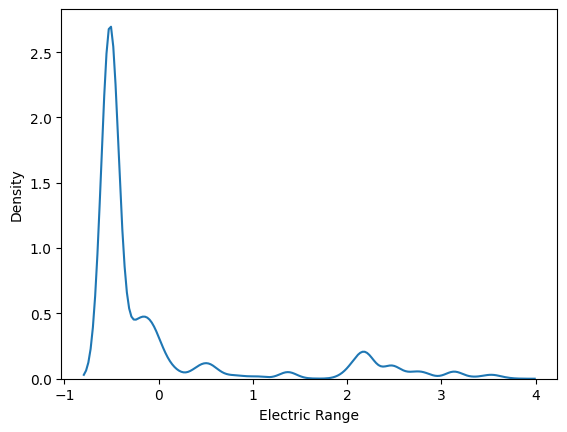

In [7]:
sns.kdeplot(x)

### `Q.2:`The average test score in a certain statistics class was 74 with a standard deviation of 8. There are 2000 students in this class. Use the emperical rule to answer the following questions:
    (a) What percentage of students scored less than 58?
    (b) What is the probability that a student score between 66 and 82 on the exam?
    (c) How many students scored at most 90?
    (d) What percentage of students scored at least 66?
    (e) How many students scored more than 98 on the test?


74.03181368340691
8.146654454200878


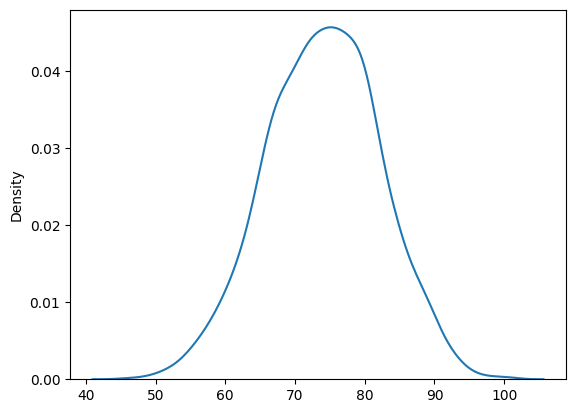

In [23]:
# Generate normally distributed data
sample = normal(loc = 74, scale = 8, size = 2000)
sns.kdeplot(sample)
print(sample.mean())
print(sample.std())

In [24]:
# i Percentage with value less than 58
percentage = (sample[sample < 58].sum()/len(sample))
print(percentage)   # 46.93191535043734

1.4576286086375294


Mean:  73.38994841954579
Std:  8.065114442712945
Percentage scored less than 58:  2.65 %


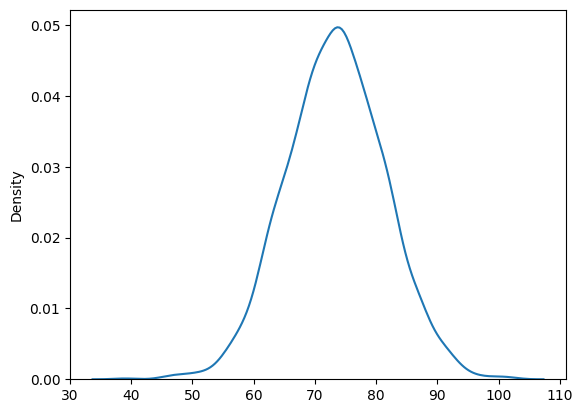

In [39]:
# Generate some normally distributed data
mu = 74
sigma = 8
data = np.random.normal(mu, sigma, size=2000)
sns.kdeplot(data)
print("Mean: ", data.mean())
print("Std: ", data.std())

# i (a) What percentage of students scored less than 58?
a = (data < 58).sum() / len(data) * 100
print("Percentage scored less than 58: ", round(a,2), "%")

In [54]:
mu = 74
sigma = 8
n_students = 2000

def z_score(x):
  return (x - mu) / sigma

# i Percentage of students scoring less than 58
z_a = z_score(58)
print(z_a)
p_a = norm.cdf(z_a)
print("P(X < 58): ", p_a, " ->", p_a*100, "%")

# ii Probability that a student scores between 66 and 82
z_b1 = z_score(66)
print(z_b1)
z_b2 = z_score(82)
print(z_b2)
p_b = norm.cdf(z_b2) - norm.cdf(z_b1)
print("P(66 <= X <= 82): ", p_b, " ->", p_b*100, "%")

# iii Probability of student scored at most 90
z_c = z_score(90)
print(z_c)
p_c = norm.cdf(z_c)
print("P(X <= 90): ", p_c, "->", p_c*100, "%")

# iv What percentage of students scored atleast 66
z_d = z_score(66)
print(z_d)
# Atleast 66
p_d = 1 - norm.cdf(z_d)
print("P(X <= 90): ", p_d, "->", p_d*100, "%")

# v How many percentage of student scored atleast 98
z_e = z_score(98)
print(z_e)
p_e = 1 - norm.cdf(z_e)
print("P(X >= 98): ", p_e, "->", p_e*100, "%")

-2.0
P(X < 58):  0.022750131948179195  -> 2.2750131948179195 %
-1.0
1.0
P(66 <= X <= 82):  0.6826894921370859  -> 68.26894921370858 %
2.0
P(X <= 90):  0.9772498680518208 -> 97.72498680518208 %
-1.0
P(X <= 90):  0.8413447460685429 -> 84.1344746068543 %
3.0
P(X >= 98):  0.0013498980316301035 -> 0.13498980316301035 %


### `Q-3:` Normally distributed IQ scores have a mean of 100 and a standard deviation of 15. Use the standard z-table to answer the following questions:

What is the probability of randomly selecting someone with an IQ score that is

    (a) less than 80?
    (b) greater than 136?
    (c) between 95 and 110?
    (d) What IQ score corresponds to the 90th percentile?
    (e) The middle 30% of IQs fall between what two values?

P(X < 80):  0.09121121972586788 -> 9.121121972586788 %
P(X > 136):  0.008197535924596155 -> 0.8197535924596155 %
P(95 <= X <= 110):  0.3780661222713134 -> 37.80661222713134 %
119.22327348316901
Middle 30% of IQs fall between: 94.22019300388648 and 105.77980699611352


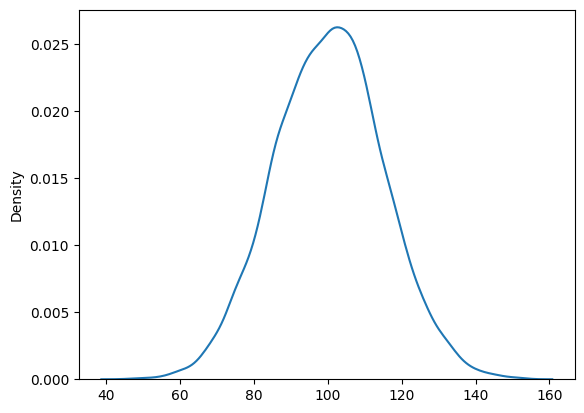

In [64]:
mu = 100
sigma = 15
n_samples = 10000

sample = normal(loc = mu, scale = sigma, size = n_samples)
sns.kdeplot(sample)

def z_score(x):
  return (x - mu) / sigma

def iq_value(z):
  return z * sigma + mu

# i. less than 80
z_a = z_score(80)
p_a = norm.cdf(z_a)
print("P(X < 80): ", p_a, "->", p_a*100, "%")

# ii. greater than 136
z_b = z_score(136)
p_b = 1 - norm.cdf(z_b)
print("P(X > 136): ", p_b, "->", p_b*100, "%")

# iii between 95 and 110
z_c1 = z_score(95)
z_c2 = z_score(110)
p_c = norm.cdf(z_c2) - norm.cdf(z_c1)
print("P(95 <= X <= 110): ", p_c, "->", p_c*100, "%")

# iv What IQ score corresponds to the 90th percentile?
# ppf stands for Percent Point Function,
# also known as the inverse CDF (Cumulative Distribution Function).
z_d = norm.ppf(0.90)
iq_score = iq_value(z_d)
print(iq_score)

# v. The middle 30% of IQs fall between what two values?
z_elow = norm.ppf(0.35)
z_ehigh = norm.ppf(0.65)

iq_low = iq_value(z_elow)
iq_high = iq_value(z_ehigh)
print("Middle 30% of IQs fall between:", iq_low, "and", iq_high)

###`Q-4`: Wine data
```
# Load dataset
import pandas as pd
from sklearn.datasets import load_wine

# load the wine dataset
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

```
Consider this "wine" dataset which can be loaded using above code. It has 13 numerical features and a target column with 3 class: 0, 1, 2.


* **Which feature is the best predictor of the wine class in the wine dataset?** (Using pdf plot)

* **Which two combination of features from below listed features are best for wine classification?** (2D pdf plot)
    * Proline
    * Flavanoids
    * Color intensity
    * OD280/OD315 of diluted wines
    * Alcohol

### Conclusion:
- Looking at figures, we can use Proline and Flavanoids features for classification.

In [65]:
# code here# Load dataset
import pandas as pd
from sklearn.datasets import load_wine

# load the wine dataset
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

In [66]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


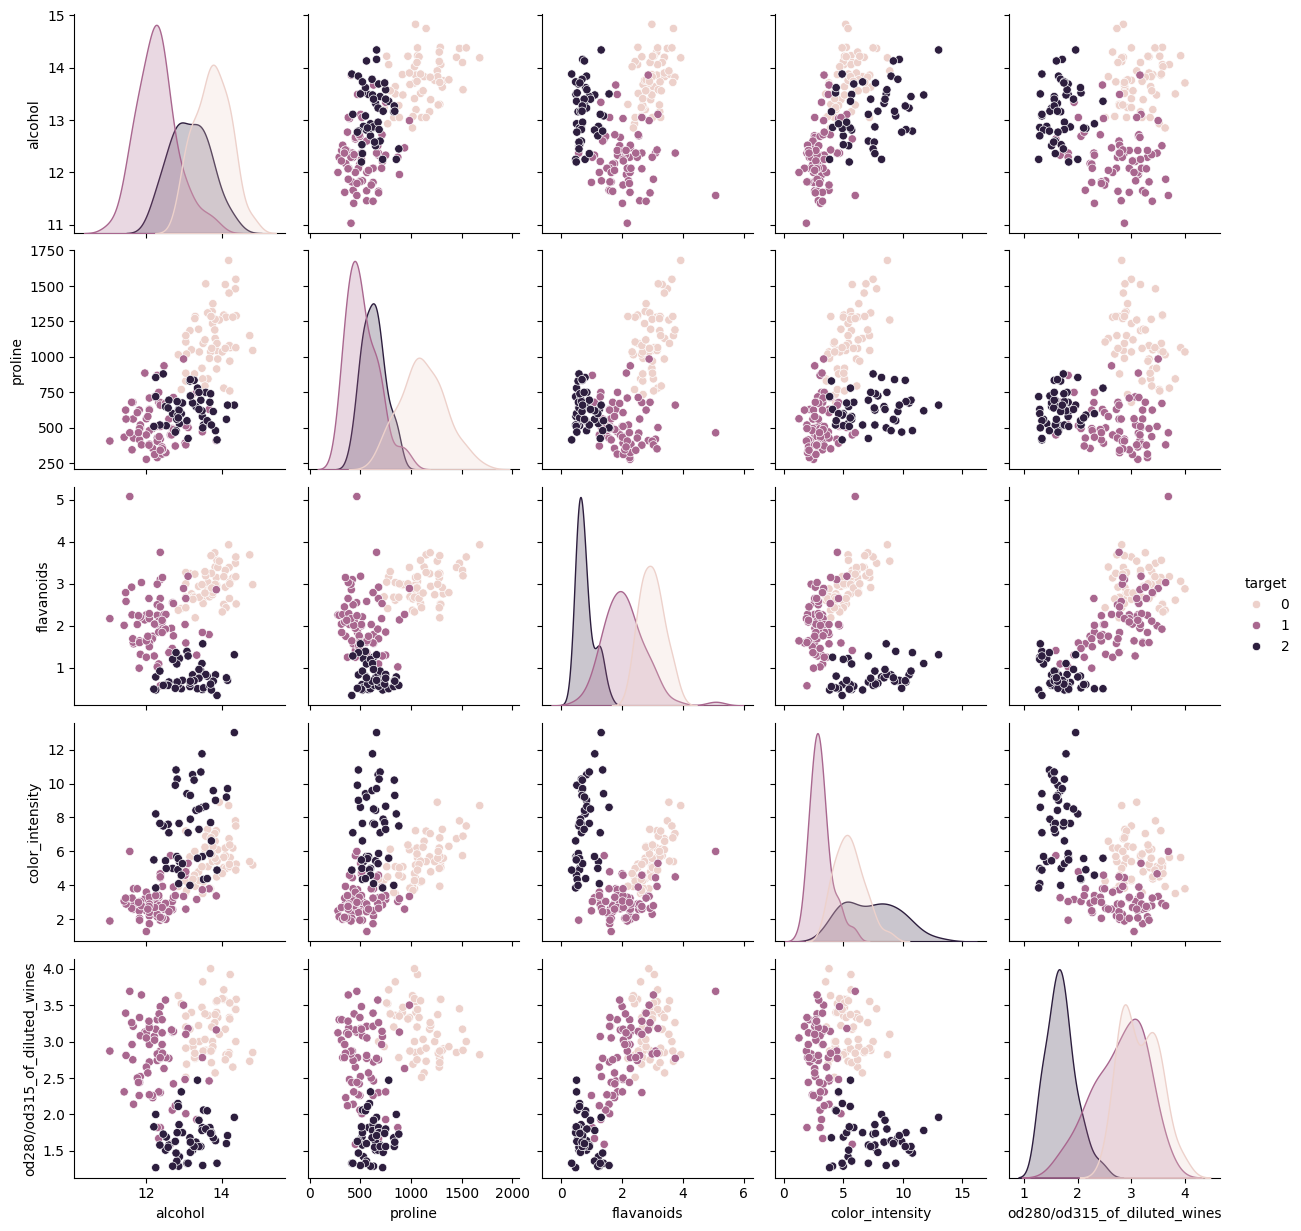

In [77]:
sns.pairplot(
    data=df[['alcohol', 'proline', 'flavanoids', 'color_intensity', 'od280/od315_of_diluted_wines', 'target']],
    hue='target'
)

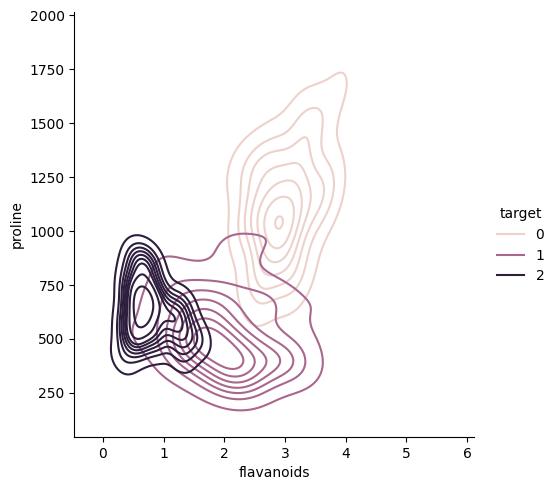

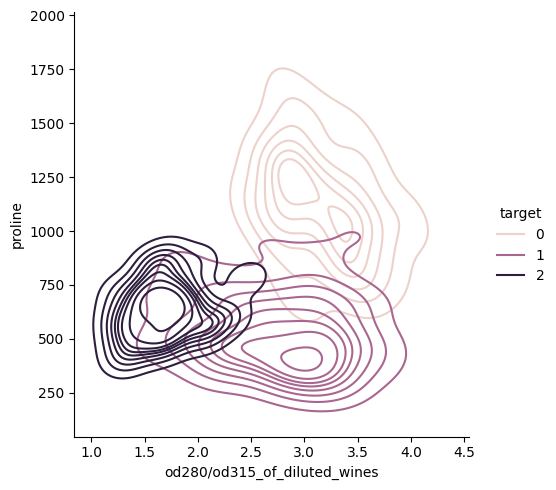

In [78]:
# proline and flavanoids
sns.displot(data = df, kind = 'kde', x = 'flavanoids', y = 'proline', hue='target')
# sns.displot(data = df, kind = 'kde', x = 'color_intensity', y = 'proline', hue='target')
sns.displot(data = df, kind = 'kde', x = 'od280/od315_of_diluted_wines', y = 'proline', hue='target')
# sns.displot(data = df, kind = 'kde', x = 'alcohol', y = 'proline', hue='target')